In [73]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

In [74]:
# Loading the  Datasets

clinic= pd.read_excel('c:\\Users\\Admin\\OneDrive\\Documents\\TS Group_EXCEL\\2024_2023_07\\Clinic.xlsx', sheet_name='Clinic')
print(clinic.head())


   No.  Order_date Date_of_creation Order_code                 Executor  \
0    1  31/07/2024       31/07/2024   DH112702  DRTS- Bác sĩ Khởi Huyền   
1    2         NaN              NaN        NaN                      NaN   
2    3  31/07/2024       31/07/2024   DH112701     DRTS-Thu ngân ca tối   
3    4  31/07/2024       31/07/2024   DH112700  DRTS- Bác sĩ Khởi Huyền   
4    5  31/07/2024       31/07/2024   DH112699     DRTS-Thu ngân ca tối   

  Customer_code               Customer_name  Year_of_birth   Age Age_group  \
0       KH23113  Nguyễn thị Hồng Nhung 1983         1983.0  41.0     41-50   
1           NaN                         NaN            NaN   NaN         0   
2       KH25194        Đồng Thanh Thúy 2001         2001.0  23.0     20-30   
3       KH21472         Lê Thuỳ Phương 1999         1999.0  25.0     20-30   
4       KH19477       NGUYỄN HỒNG NGỌC 1998         1998.0  26.0     20-30   

   ...                               Order_terms  Payment_method  \
0  ...  Thời

In [75]:
clinic.head(5)

,No.,Order_date,Date_of_creation,Order_code,Executor,Customer_code,Customer_name,Year_of_birth,Age,Age_group,...,Order_terms,Payment_method,Payment_method_per_time,Payment_date,Referral,Creator,Date_of_birth,Consultant,Marketing,Service_order
0,1,31/07/2024,31/07/2024,DH112702,DRTS- Bác sĩ Khởi Huyền,KH23113,Nguyễn thị Hồng Nhung 1983,1983.0,41.0,41-50,...,Thời gian giao hàng:\nĐịa chỉ giao hàng:,NaN,NaN,31/07/2024 00:00,NaN,PK1 Thu ngân Ca tối,NaN,NaN,NaN,Không
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,31/07/2024,31/07/2024,DH112701,DRTS-Thu ngân ca tối,KH25194,Đồng Thanh Thúy 2001,2001.0,23.0,20-30,...,Thời gian giao hàng:\nĐịa chỉ giao hàng:,NaN,NaN,31/07/2024 00:00,NaN,PK1 Thu ngân Ca tối,NaN,NaN,NaN,Có
3,4,31/07/2024,31/07/2024,DH112700,DRTS- Bác sĩ Khởi Huyền,KH21472,Lê Thuỳ Phương 1999,1999.0,25.0,20-30,...,Thời gian giao hàng:\nĐịa chỉ giao hàng:,NaN,NaN,31/07/2024 00:00,NaN,PK1 Thu ngân Ca tối,NaN,NaN,NaN,Không
4,5,31/07/2024,31/07/2024,DH112699,DRTS-Thu ngân ca tối,KH19477,NGUYỄN HỒNG NGỌC 1998,1998.0,26.0,20-30,...,Thời gian giao hàng:\nĐịa chỉ giao hàng:,NaN,NaN,31/07/2024 00:00,NaN,PK1 Thu ngân Ca tối,NaN,NaN,NaN,Có


In [76]:
print("Total records (rows) in the TCM2 Dataset : {}".format(clinic.shape[0]))
print("Total features (columns) in the TCM2 Dataset : {}".format(clinic.shape[1]))

Total records (rows) in the TCM2 Dataset : 101924
Total features (columns) in the TCM2 Dataset : 55


1. RFM

In [77]:
#Convert the column to datetime, coerce any errors (like invalid date formats)
clinic['Order_date'] = pd.to_datetime(clinic['Order_date'], errors='coerce')

# Drop any rows where the conversion to datetime failed (optional, based on your data handling strategy)
clinic = clinic.dropna(subset=['Order_date'])

# Now, get the maximum date
max_order_date = clinic['Order_date'].max()
print(max_order_date)

2024-07-31 00:00:00


C:\Users\Admin\AppData\Local\Temp\ipykernel_2432\3267358403.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  clinic['Order_date'] = pd.to_datetime(clinic['Order_date'], errors='coerce')


In [78]:
# Maximum Transaction Date or the latest transaction date.

max_order_date = max(clinic['Order_date']).date()
max_order_date

datetime.date(2024, 7, 31)

In [79]:
# Taking the last transaction date as a reference date for comparision and 
# finding the number of days between a transaction date and last transaction date to compute the recency.
# Lấy ngày giao dịch cuối cùng làm ngày tham chiếu để so sánh và
# tìm số ngày giữa ngày giao dịch và ngày giao dịch cuối cùng để tính thời gian gần đây.

comparison_date = datetime.strptime(str(max_order_date), "%Y-%m-%d")

In [80]:
# Reset index để biến Phone_number thành một cột
clinic.reset_index(inplace=True)

# Chuyển đổi Phone_number sang dạng chuỗi (nếu cần)
clinic['Phone_number'] = clinic['Phone_number'].astype(str)


In [81]:
import pandas as pd

# Giả sử 'data' là DataFrame của bạn

# Chuyển đổi cột Phone_number về dạng chuỗi
clinic['Phone_number'] = clinic['Phone_number'].astype(str)

# Loại bỏ phần ".0" nếu cần thiết
clinic['Phone_number'] = clinic['Phone_number'].str.replace('.0', '', regex=False)


In [82]:
# Thêm số 0 vào trước các số điện thoại
clinic['Phone_number'] = '0' + clinic['Phone_number']

# Kiểm tra kết quả
print(clinic.head())  # Hiển thị 5 dòng đầu tiên của DataFrame

   index  No. Order_date Date_of_creation Order_code                 Executor  \
0      0    1 2024-07-31       31/07/2024   DH112702  DRTS- Bác sĩ Khởi Huyền   
1      2    3 2024-07-31       31/07/2024   DH112701     DRTS-Thu ngân ca tối   
2      3    4 2024-07-31       31/07/2024   DH112700  DRTS- Bác sĩ Khởi Huyền   
3      4    5 2024-07-31       31/07/2024   DH112699     DRTS-Thu ngân ca tối   
4      9   10 2024-07-31       31/07/2024   DH112698     DRTS-Thu ngân ca tối   

  Customer_code               Customer_name  Year_of_birth   Age  ...  \
0       KH23113  Nguyễn thị Hồng Nhung 1983         1983.0  41.0  ...   
1       KH25194        Đồng Thanh Thúy 2001         2001.0  23.0  ...   
2       KH21472         Lê Thuỳ Phương 1999         1999.0  25.0  ...   
3       KH19477       NGUYỄN HỒNG NGỌC 1998         1998.0  26.0  ...   
4       KH25048        Nguyễn Thị Thúy 1991         1991.0  33.0  ...   

                                Order_terms Payment_method  \
0  Thời gian

In [83]:
# Creating an RFM table with recency, frequency, and monetary values.
clinic_rfm_table = clinic.groupby(['Phone_number']).agg({
    'Order_date': lambda date: (comparison_date - date.max()).days,  # Recency
    'Product_code': lambda prod_id: len(prod_id),  # Frequency (count of product codes)
    'Revenue': lambda p: sum(p)  # Monetary (sum of order amounts)
})

print(clinic_rfm_table)

              Order_date  Product_code     Revenue
Phone_number                                      
018138452647          14             1    150000.0
0325025693             5             4  12425000.0
0325091698           387             2   2070000.0
0325326929           379             3    400000.0
0325333552            81             2    450000.0
...                  ...           ...         ...
0989971019            60             3  11660000.0
0989987192            49             4    565000.0
0989988851           366             3   7130000.0
0989992556           152             2   5590000.0
0989997109             3             3  11025000.0

[5942 rows x 3 columns]


In [84]:
# The columns in rfm_table dataframe are not properly named. Renaming of the columns to appropiate name is needed

clinic_rfm_table.columns

Index(['Order_date', 'Product_code', 'Revenue'], dtype='object')

In [85]:
# Renaming column names to appropiate names

clinic_rfm_table.rename(columns={'Order_date' : 'recency', 
                        'Product_code' : 'frequency',
                        'Revenue' : 'monetary'} , inplace=True)

In [86]:
print(clinic_rfm_table['frequency'].describe())

count    5942.000000
mean        3.438405
std         3.014775
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        32.000000
Name: frequency, dtype: float64


In [87]:
clinic_rfm_table['r_quartile'] = pd.qcut(clinic_rfm_table['recency'], 4, labels=['4','3','2','1'], duplicates='drop')
clinic_rfm_table['f_quartile'] = pd.qcut(clinic_rfm_table['frequency'],4 , labels=['1','2','3','4'], duplicates='drop')
clinic_rfm_table['m_quartile'] = pd.qcut(clinic_rfm_table['monetary'], 4, labels=['1','2','3','4'], duplicates='drop')


In [88]:
clinic_rfm_table

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
Phone_number,,,,,,
018138452647,14,1,150000.0,4,1,1
0325025693,5,4,12425000.0,4,3,4
0325091698,387,2,2070000.0,1,1,2
0325326929,379,3,400000.0,1,2,1
0325333552,81,2,450000.0,2,1,1
...,...,...,...,...,...,...
0989971019,60,3,11660000.0,3,2,4
0989987192,49,4,565000.0,3,3,1
0989988851,366,3,7130000.0,1,2,3


In [89]:
# Caluclation of RFM Score.
# Max weightage is given to recency then frequency and then  monetary.
# Tính điểm RFM.
# Trọng số tối đa được đưa ra cho mức độ mới, sau đó là tần suất và sau đó là tiền tệ.

clinic_rfm_table['rfm_score'] = 100*clinic_rfm_table['r_quartile'].astype(int)+10*clinic_rfm_table['f_quartile'].astype(int)+clinic_rfm_table['m_quartile'].astype(int)

In [90]:
# Assigning a title to a customer.
# Platinum corresponds to highest range of RFM score down to Bronze to lowest range of RFM score.

clinic_rfm_table['customer_title'] = pd.qcut(clinic_rfm_table['rfm_score'], 4, ['Bronze','Silver','Gold','Platinum'])

In [91]:
clinic_rfm_table

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title
Phone_number,,,,,,,,
018138452647,14,1,150000.0,4,1,1,411,Gold
0325025693,5,4,12425000.0,4,3,4,434,Platinum
0325091698,387,2,2070000.0,1,1,2,112,Bronze
0325326929,379,3,400000.0,1,2,1,121,Bronze
0325333552,81,2,450000.0,2,1,1,211,Bronze
...,...,...,...,...,...,...,...,...
0989971019,60,3,11660000.0,3,2,4,324,Gold
0989987192,49,4,565000.0,3,3,1,331,Gold
0989988851,366,3,7130000.0,1,2,3,123,Bronze


Merge both RMF with clinic

In [93]:
clinic_Tsgroup_rfm = pd.merge(clinic,clinic_rfm_table, left_on='Phone_number', right_on='Phone_number', how='inner')

In [31]:
clinic_Tsgroup_rfm

,No.,Order_date,Date_of_creation,Order_code,Executor,Customer_code,Customer_name,Year_of_birth,Age,Age_group,...,Marketing,Service_order,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title
0,1,2024-07-31,31/07/2024,DH112702,DRTS- Bác sĩ Khởi Huyền,KH23113,Nguyễn thị Hồng Nhung 1983,1983.0,41.0,41-50,...,NaN,Không,0,7,20893000.0,4,4,4,444,Platinum
1,3,2024-07-31,31/07/2024,DH112701,DRTS-Thu ngân ca tối,KH25194,Đồng Thanh Thúy 2001,2001.0,23.0,20-30,...,NaN,Có,0,1,150000.0,4,1,1,411,Gold
2,4,2024-07-31,31/07/2024,DH112700,DRTS- Bác sĩ Khởi Huyền,KH21472,Lê Thuỳ Phương 1999,1999.0,25.0,20-30,...,NaN,Không,0,21,25270000.0,4,4,4,444,Platinum
3,5,2024-07-31,31/07/2024,DH112699,DRTS-Thu ngân ca tối,KH19477,NGUYỄN HỒNG NGỌC 1998,1998.0,26.0,20-30,...,NaN,Có,0,7,1465000.0,4,4,2,442,Platinum
4,10,2024-07-31,31/07/2024,DH112698,DRTS-Thu ngân ca tối,KH25048,Nguyễn Thị Thúy 1991,1991.0,33.0,31-40,...,NaN,Có,0,2,300000.0,4,1,1,411,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20426,101869,2024-03-01,01/03/2024,DH88005,DRTS- Thu ngân ca ngày,KH19891,Giang Thị Hiền 1990,1990.0,34.0,31-40,...,NaN,Có,7,8,3012000.0,4,4,2,442,Platinum
20427,101870,2024-03-01,01/03/2024,DH88004,DRTS- Thu ngân ca ngày,KH20729,Nguyễn Thị Thùy Dung 1996,1996.0,28.0,20-30,...,NaN,Có,152,3,15235000.0,1,2,4,124,Bronze
20428,101884,2024-03-01,01/03/2024,DH88003,DRTS- Thu ngân ca ngày,KH20729,Nguyễn Thị Thùy Dung 1996,1996.0,28.0,20-30,...,NaN,Có,152,3,15235000.0,1,2,4,124,Bronze
20429,101904,2024-03-01,01/03/2024,DH88002,DRTS- Thu ngân ca ngày,KH20731,Vũ Thị Nụ 1983,1983.0,41.0,41-50,...,NaN,Có,152,2,8605000.0,1,1,3,113,Bronze


Creating an age group feature

In [32]:
clinic_Tsgroup_rfm['Age_group'] = pd.to_numeric(clinic_Tsgroup_rfm['Age_group'], errors='coerce')


In [33]:
clinic_Tsgroup_rfm['Age_Group'] = clinic_Tsgroup_rfm['Age_group'].apply(lambda x: (math.floor(x/10) + 1) * 10 if pd.notnull(x) else x)


Creating a detail customer title/tag based on RFM score

In [94]:
def cust_score_title_lkup(cols):
    
    rfm_score = cols[0]
    
    if rfm_score >= 444:
        return 'Platinum Customer'
    elif rfm_score >=433 and rfm_score < 444:
        return 'Very Loyal'
    elif rfm_score >=421 and rfm_score < 433:
        return 'Becoming Loyal'
    elif rfm_score >=344 and rfm_score < 421:
        return 'Recent Customer'
    elif rfm_score >=323 and rfm_score < 344:
        return 'Potential Customer'
    elif rfm_score >=311 and rfm_score < 323:
        return 'Late Bloomer'
    elif rfm_score >=224 and rfm_score < 311:
        return 'Loosing Customer'
    elif rfm_score >=212 and rfm_score < 224:
        return 'High Risk Customer'
    elif rfm_score >=124 and rfm_score < 212:
        return 'Almost Lost Customer'
    elif rfm_score >=112 and rfm_score < 124:
        return 'Evasive Customer'
    else :
        return 'Lost Customer'

In [95]:
# Applying the above functions and creating a new feature detail_cust_title

clinic_Tsgroup_rfm['detail_cust_title']=clinic_Tsgroup_rfm[['rfm_score']].apply(cust_score_title_lkup, axis=1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2432\4027663716.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rfm_score = cols[0]


In [96]:
# Function to provide ranks to the customers based on their title.

def get_rank(cols):
    
    title = cols[0]
    
    if title=='Platinum Customer':
        return 1
    elif title=='Very Loyal':
        return 2
    elif title == 'Becoming Loyal':
        return 3
    elif title == 'Recent Customer':
        return 4
    elif title=='Potential Customer':
        return 5
    elif title == 'Late Bloomer':
        return 6
    elif title == 'Loosing Customer':
        return 7
    elif title=='High Risk Customer':
        return 8
    elif title == 'Almost Lost Customer':
        return 9
    elif title == 'Evasive Customer':
        return 10
    else :
        return 11

In [97]:
# Applying the above functions and creating a new feature rank

clinic_Tsgroup_rfm['rank']=clinic_Tsgroup_rfm[['detail_cust_title']].apply(get_rank, axis=1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2432\782112168.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  title = cols[0]


2. Exporting to CSV File

In [38]:
clinic_Tsgroup_rfm.to_csv('clinic_Tsgroup_RFM_Analsysis.csv', index=False)

In [39]:
print("Total records in final dataset : {}".format(clinic_Tsgroup_rfm.shape[0]))

Total records in final dataset : 20431


3. Data Analysis and Exploration

C:\Users\Admin\AppData\Local\Temp\ipykernel_2432\638082715.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(clinic_Tsgroup_rfm['Age'], kde=False, bins=15)


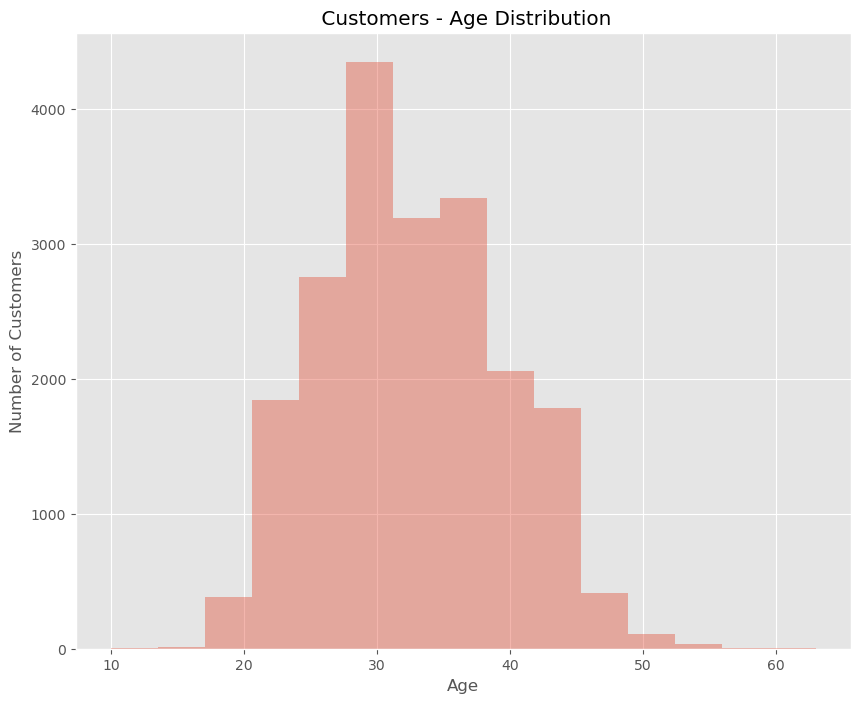

In [111]:
plt.figure(figsize=(10,8))
sns.distplot(clinic_Tsgroup_rfm['Age'], kde=False, bins=15)
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title(' Customers - Age Distribution')

plt.show()

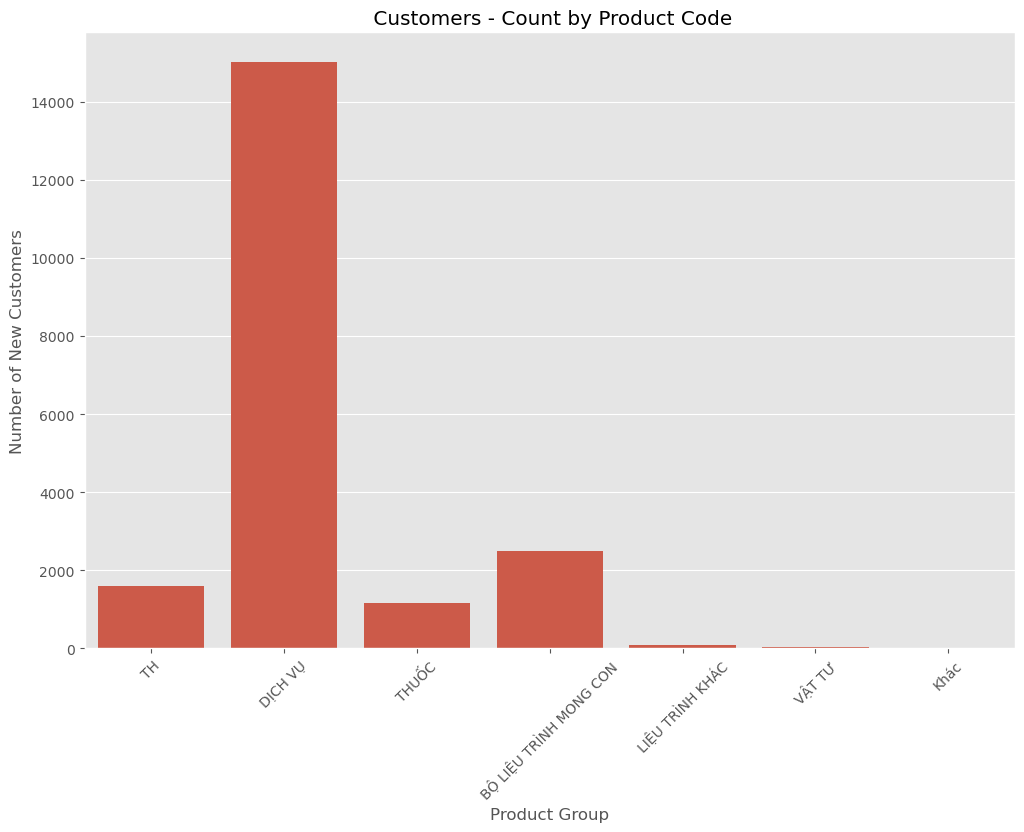

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử dataframe của bạn là new_cust với cột 'Product_Code' và 'Customer_ID'
plt.figure(figsize=(12, 8))

# Vẽ biểu đồ cột số lượng khách hàng theo mã sản phẩm
sns.countplot(x='Product_group', data=clinic_Tsgroup_rfm)

# Thêm tiêu đề và nhãn cho trục
plt.title(' Customers - Count by Product Code')
plt.xlabel('Product Group')
plt.ylabel('Number of New Customers')

# Xoay nhãn trục x để dễ đọc nếu mã sản phẩm dài
plt.xticks(rotation=45)

plt.show()


4. RFM Analysis Scatter Plots

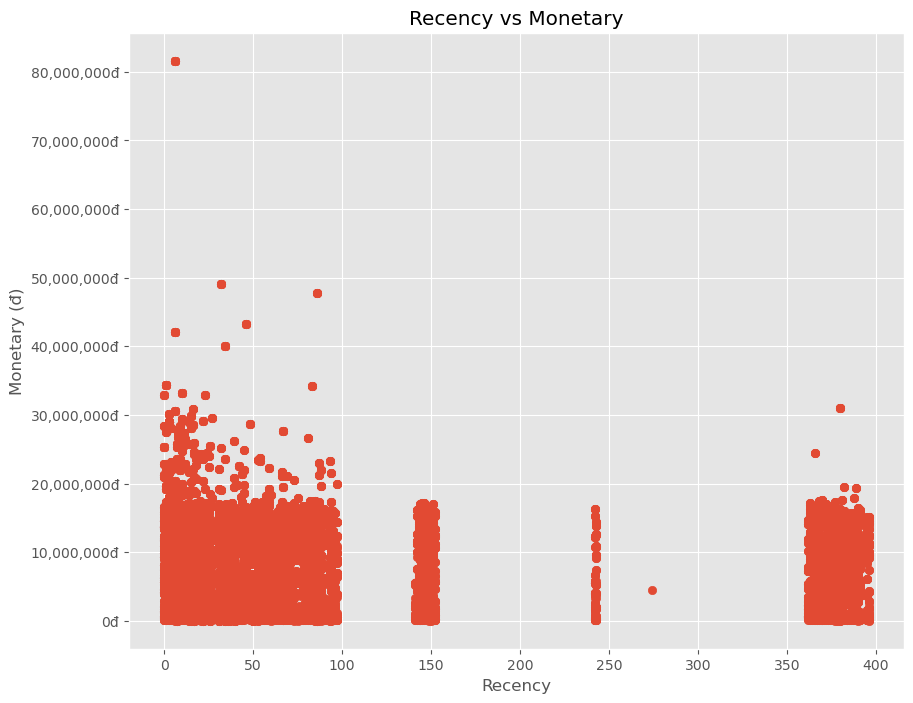

In [42]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # Thêm dòng này để nhập module ticker

# Tạo biểu đồ phân tán
plt.figure(figsize=(10,8))
ax = plt.gca()
ax.scatter(clinic_Tsgroup_rfm['recency'], clinic_Tsgroup_rfm['monetary'])

# Đặt nhãn và tiêu đề cho biểu đồ
plt.xlabel('Recency')
plt.ylabel('Monetary (đ)')
plt.title('Recency vs Monetary')

# Định dạng trục y để hiển thị số tiền với dấu phân cách hàng nghìn và ký hiệu đồng
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}đ'))

# Hiển thị biểu đồ
plt.show()


Frequency vs Monetary

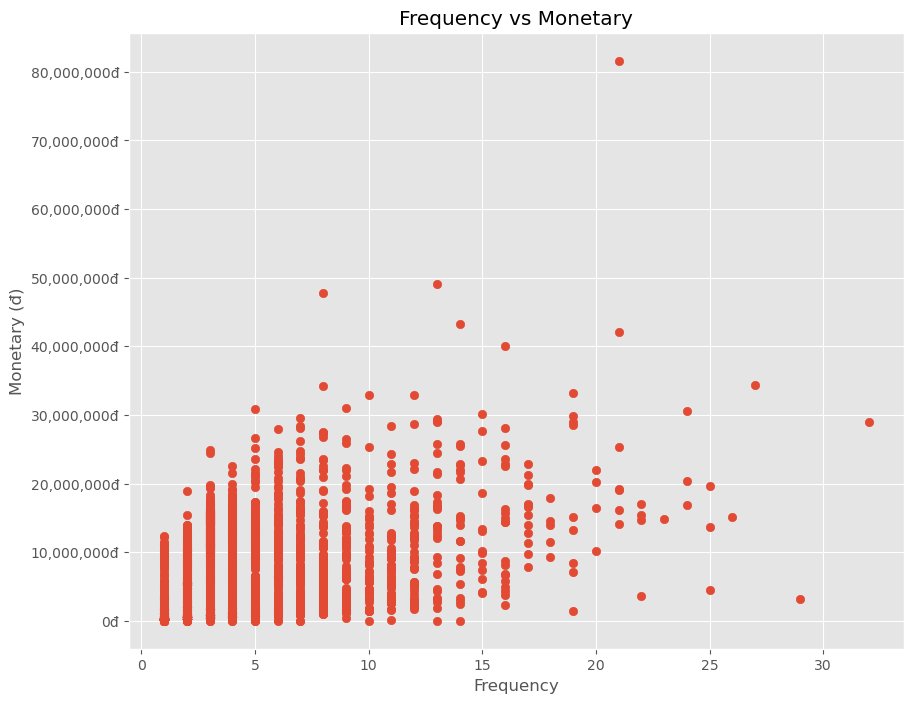

In [43]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # Thêm dòng này để nhập module ticker

# Tạo biểu đồ phân tán
plt.figure(figsize=(10,8))
ax = plt.gca()
ax.scatter(clinic_rfm_table['frequency'], clinic_rfm_table['monetary'])

# Đặt nhãn và tiêu đề cho biểu đồ
plt.xlabel('Frequency')
plt.ylabel('Monetary (đ)')
plt.title('Frequency vs Monetary')

# Định dạng trục y để hiển thị số tiền với dấu phân cách hàng nghìn và ký hiệu đồng
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}đ'))

# Hiển thị biểu đồ
plt.show()


5. Customer Segment Distribution

#Finally we can plot the Number of Customers present under a Customer Segment
#Cuối cùng, chúng ta có thể biểu đồ Số lượng khách hàng hiện diện trong một Phân khúc khách hàng

In [44]:
# Calculating the number of unique customers under a customer title.

cust_per_title = clinic_Tsgroup_rfm[['detail_cust_title', 'Customer_code','rank']].drop_duplicates().groupby(
    ['detail_cust_title','rank']).size().reset_index().sort_values('rank')

In [45]:
cust_per_title.rename(columns={0:'Number of Customers'}, inplace=True)
cust_per_title

,detail_cust_title,rank,Number of Customers
7,Platinum Customer,1,241
10,Very Loyal,2,457
1,Becoming Loyal,3,381
9,Recent Customer,4,499
8,Potential Customer,5,705
4,Late Bloomer,6,693
5,Loosing Customer,7,475
3,High Risk Customer,8,584
0,Almost Lost Customer,9,837
2,Evasive Customer,10,635


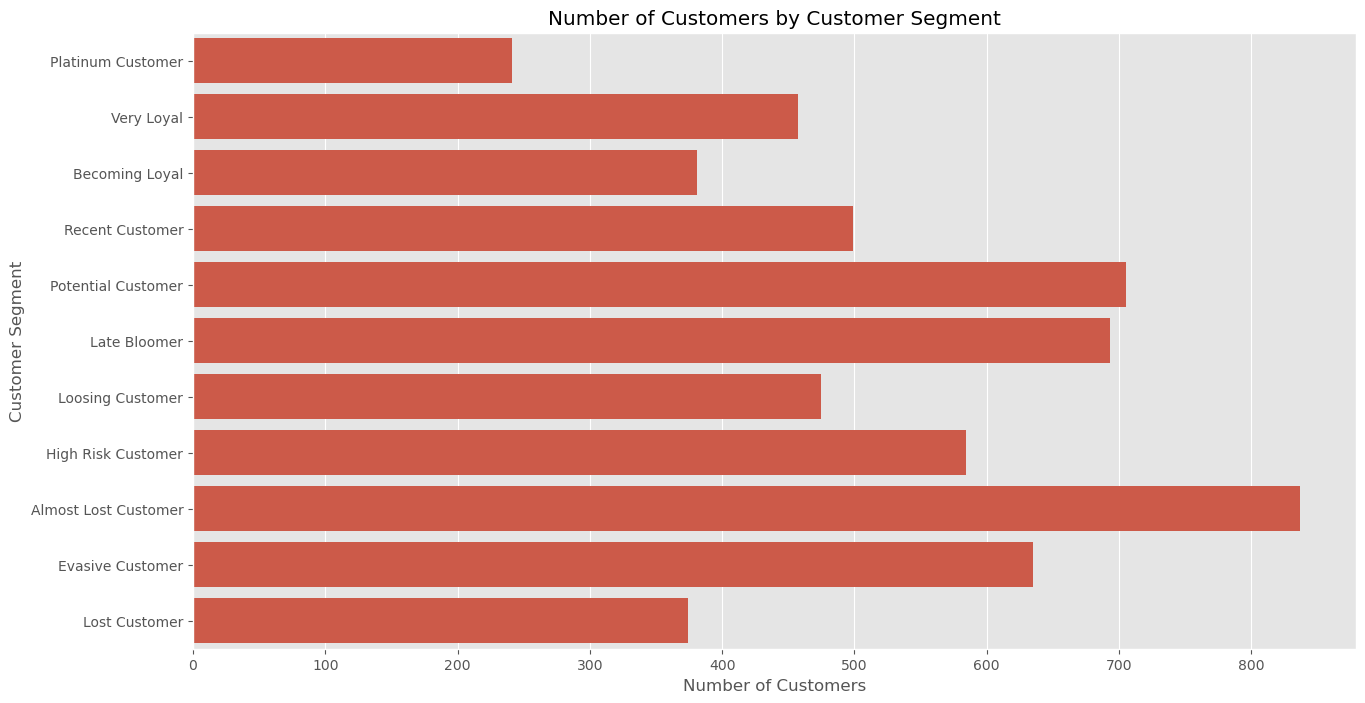

In [98]:
# Plotting the Number of Customers

plt.figure(figsize=(15,8))
sns.barplot(y='detail_cust_title' , x='Number of Customers', data=cust_per_title)
plt.xlabel('Number of Customers')
plt.ylabel('Customer Segment')
plt.title('Number of Customers by Customer Segment')
plt.show()

In [103]:
clinic_Tsgroup_rfm

,index,No.,Order_date,Date_of_creation,Order_code,Executor,Customer_code,Customer_name,Year_of_birth,Age,...,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title,detail_cust_title,rank
0,0,1,2024-07-31,31/07/2024,DH112702,DRTS- Bác sĩ Khởi Huyền,KH23113,Nguyễn thị Hồng Nhung 1983,1983.0,41.0,...,0,7,20893000.0,4,4,4,444,Platinum,Platinum Customer,1
1,2,3,2024-07-31,31/07/2024,DH112701,DRTS-Thu ngân ca tối,KH25194,Đồng Thanh Thúy 2001,2001.0,23.0,...,0,1,150000.0,4,1,1,411,Gold,Recent Customer,4
2,3,4,2024-07-31,31/07/2024,DH112700,DRTS- Bác sĩ Khởi Huyền,KH21472,Lê Thuỳ Phương 1999,1999.0,25.0,...,0,21,25270000.0,4,4,4,444,Platinum,Platinum Customer,1
3,4,5,2024-07-31,31/07/2024,DH112699,DRTS-Thu ngân ca tối,KH19477,NGUYỄN HỒNG NGỌC 1998,1998.0,26.0,...,0,7,1465000.0,4,4,2,442,Platinum,Very Loyal,2
4,9,10,2024-07-31,31/07/2024,DH112698,DRTS-Thu ngân ca tối,KH25048,Nguyễn Thị Thúy 1991,1991.0,33.0,...,0,2,300000.0,4,1,1,411,Gold,Recent Customer,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20426,101868,101869,2024-03-01,01/03/2024,DH88005,DRTS- Thu ngân ca ngày,KH19891,Giang Thị Hiền 1990,1990.0,34.0,...,7,8,3012000.0,4,4,2,442,Platinum,Very Loyal,2
20427,101869,101870,2024-03-01,01/03/2024,DH88004,DRTS- Thu ngân ca ngày,KH20729,Nguyễn Thị Thùy Dung 1996,1996.0,28.0,...,152,3,15235000.0,1,2,4,124,Bronze,Almost Lost Customer,9
20428,101883,101884,2024-03-01,01/03/2024,DH88003,DRTS- Thu ngân ca ngày,KH20729,Nguyễn Thị Thùy Dung 1996,1996.0,28.0,...,152,3,15235000.0,1,2,4,124,Bronze,Almost Lost Customer,9
20429,101903,101904,2024-03-01,01/03/2024,DH88002,DRTS- Thu ngân ca ngày,KH20731,Vũ Thị Nụ 1983,1983.0,41.0,...,152,2,8605000.0,1,1,3,113,Bronze,Evasive Customer,10


In [102]:
clinic_rfm_table

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title
Phone_number,,,,,,,,
018138452647,14,1,150000.0,4,1,1,411,Gold
0325025693,5,4,12425000.0,4,3,4,434,Platinum
0325091698,387,2,2070000.0,1,1,2,112,Bronze
0325326929,379,3,400000.0,1,2,1,121,Bronze
0325333552,81,2,450000.0,2,1,1,211,Bronze
...,...,...,...,...,...,...,...,...
0989971019,60,3,11660000.0,3,2,4,324,Gold
0989987192,49,4,565000.0,3,3,1,331,Gold
0989988851,366,3,7130000.0,1,2,3,123,Bronze


Merge clinic vs clinic_RFM_Tsgroup

In [109]:
TCM2_rfm_table_rfm = pd.merge(clinic, clinic_rfm_table, left_on='Phone_number', right_on='Phone_number', how='inner')

Exporting File

In [110]:
clinic_Tsgroup_rfm.to_csv('Clinic_RFM_Analysis_2023_2024_07.csv', index=False)